# **Movie Review Classification**

Download the dataset from this link : https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000) 

In [2]:
df1 = pd.read_csv("IMDB Dataset.csv")

In [3]:
df1.shape

(50000, 2)

In [4]:
# Taking only sample data 

df = df1.sample(5000)

In [5]:
df.head(3)

,review,sentiment
597,In short if you want to watch Burt Reynolds be...,positive
5856,I've seen The Blob several times and is one of...,positive
48580,I am not sure why I like Dolph Lundgren. I gue...,negative


In [6]:
# Reset the index
df = df.reset_index()

In [7]:
df.head(3)

,index,review,sentiment
0,597,In short if you want to watch Burt Reynolds be...,positive
1,5856,I've seen The Blob several times and is one of...,positive
2,48580,I am not sure why I like Dolph Lundgren. I gue...,negative


In [8]:
# Taking only review and sentiment column

df = df.iloc[:, 1:]

# Data Cleaning:

1) Detect which language it is and make the separate dataframe for each language
2) Remove the puncutiation marks, numbers ..etc
3) Make the Lower case
4) Remove the stop words
5) Lemittization
6) Find a way to convert text data to numeric data

### 1) Detecting the language in each row of the text column

In [9]:
from langdetect import detect
detect("War doesn't show who's right, just who's left.")

'en'

In [10]:
# Making a separate column Language which displays the name of the language in each row

df['Language'] = df['review'].apply(lambda x: detect(x))

In [11]:
df['Language'].value_counts()

en    5000
Name: Language, dtype: int64

In [12]:
# All the 5000 samples have english sentences 

### 2) Removing punctuation, digits, spaces, and  making lower case

In [13]:
import string

df['review'] = df['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [14]:
# removing digits

df['review'] = df['review'].apply(lambda x: ''.join([i for i in x if i not in string.digits]))

In [15]:
# removing spaces from data

df['review'] = df['review'].apply(lambda x: ' '.join(x.split()))

In [16]:
# making the Lower case

df['review'] = df['review'].apply(lambda x: x.lower())

### 4) Removing stop words

In [17]:
# Stop words from spacy library
from spacy.lang.en.stop_words import STOP_WORDS

df['review'] = df['review'].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))

### 5) Lemmatization

In [18]:
# usig spacy
import spacy
en_core = spacy.load('en_core_web_sm')

df['new_review'] = df['review'].apply(lambda x : " ".join([y.lemma_ for y in en_core(x)]))

### 6) Converting text data into numeric data

In [19]:
df.shape

(5000, 4)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 10000)

tfidf_vectors = vec.fit_transform(df['new_review'])

In [21]:
new_df = pd.DataFrame(tfidf_vectors.toarray(), columns = vec.get_feature_names())
new_df.head()

,aa,aardman,aaron,abandon,abbey,abbot,abbott,abc,abduct,ability,abject,able,ably,aboard,abominable,abomination,aborigine,abortion,abound,aboutbr,abr,abraham,abroad,abrupt,abruptly,absence,absent,absolute,absolutely,absorb,absurd,absurdist,absurdity,absurdly,abu,abundance,abuse,abusive,abysmal,academic,academy,accent,accentuate,accept,acceptable,acceptance,access,accessible,accident,accidental,...,yeah,year,yearbr,yearn,yearning,yearold,yearsbr,yell,yellow,yes,yesterday,yo,yoda,yoko,york,yorker,you,youbr,young,youngster,yourselfbr,youth,youthful,youtube,yuck,yul,yum,yup,yve,zabriskie,zahn,zane,zaphod,zealand,zelah,zellweger,zephyr,zero,zeta,zhang,zizek,zodiac,zoe,zoey,zombi,zombie,zone,zoom,zu,zucco
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.027866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analysing Target column

In [22]:
df['sentiment'].value_counts()

negative    2541
positive    2459
Name: sentiment, dtype: int64

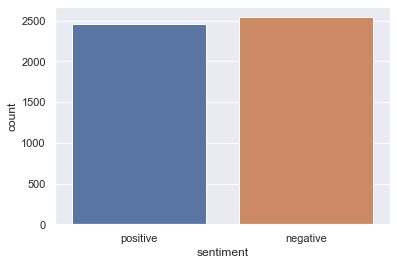

In [23]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sentiment", data=df)

Since the target column is balanced no need to do under or oversamapling

In [24]:
y = df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

In [25]:
y.value_counts()

0    2541
1    2459
Name: sentiment, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.2)

# Logestic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 200)
log_model = log.fit(X_train, y_train)

In [28]:
y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.853


# KNN Classifier

In [29]:
#First we take k value 1 then we check the model then in the below we can understand how to select k value

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors is the k value
knn_model = knn.fit(X_train, y_train)

In [30]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.671


In [31]:
# predicting the right k value
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

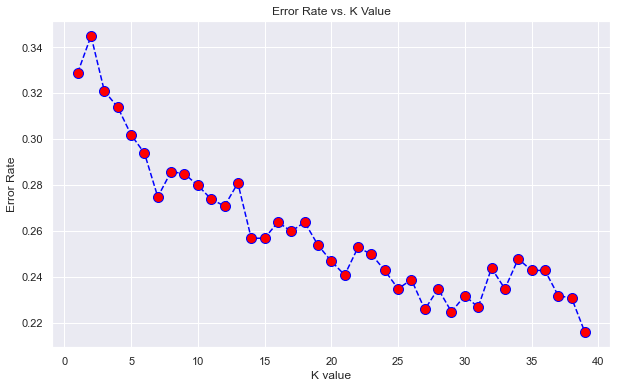

In [32]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

As we can see in the graph at k value 39 the error rate is less and it is stable to some extinct so we can select k value as 39

In [33]:
# making K value as 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 39) # n_neighbors is the k value
knn_model = knn.fit(X_train, y_train)

In [34]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.784


# Naive Bayes - Gaussian

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred = nb_model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.641


# Naive Bayes Multinomial

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb_model1 = MultinomialNB()
nb_model1.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred_m = nb_model1.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred_m, y_test)
print(score)

0.824


# SVM (Linear)

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
svm_model = classifier.fit(X_train, y_train)

In [40]:
y_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.846


# SVM (RBF)

In [41]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
svm_model_rbf = classifier.fit(X_train, y_train)

In [42]:
y_pred = svm_model_rbf.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.853


# Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

In [44]:
y_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.661


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model = rf.fit(X_train, y_train)

In [46]:
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.836


# Ada Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab_model = rf.fit(X_train, y_train)

In [48]:
y_pred = ab_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.836


# XG-Boost

In [49]:
import xgboost
xg = xgboost.XGBClassifier()
xgboost_model = xg.fit(X_train, y_train)

[13:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
y_pred = ab_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.836


# XG-Boost By Hyper-Parameter Tuning

In [51]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [52]:
classifier = xgboost.XGBClassifier()

In [53]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [54]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=1, cv=3, verbose=3)

In [55]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[13:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.859, total=  13.1s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


[13:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.869, total=  14.8s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.9s remaining:    0.0s


[13:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.0, colsample_bytree=0.5, score=0.885, total=  12.4s
[CV] min_child_weight=5, max_depth=12, learning_rate=0.25, gamma=0.4, colsample_bytree=0.3 
[13:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=12, learning_rate=0.25, gamma=0.4, colsample_bytree=0.3, score=0.861, total=  19.6s
[CV] min_child_weight=5, max_depth=12, learning_r

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.1min finished


[13:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [56]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [58]:
best_classifier_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
best_classifier_model.fit(X_train, y_train)

[13:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
y_pred = best_classifier_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.809


## If you want to run the model using cross validation then below is the code

In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(best_classifier_model, new_df, y, cv=3)

[13:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
score

array([0.80503899, 0.79844031, 0.81992797])

In [63]:
score.mean()

0.8078024251092158

# **Conclusion**

When we compare the scores of all models, for SVM (RBF) we got high accuracy score